https://blog.promedius.ai/pytorch_dataloader_1/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import glob

In [3]:
train_data = glob.glob("/content/drive/MyDrive/pytorch/week 3/train/*/*")

val_data = glob.glob("/content/drive/MyDrive/pytorch/week 3/validation/*/*")

In [4]:
print(len(train_data))
print(len(val_data))

1000
600


1000 / 64 = 15.625   
600 / 64 = 9.375

In [5]:
train_data[0]

'/content/drive/MyDrive/pytorch/week 3/train/cats/0.jpg'

In [6]:
train_data[0][44:47]

'cat'

In [7]:
# label 정보가 들은 리스트 만들어주기
label_all = []

for i in range(len(train_data)):
  if train_data[i][44:47] == "dog":
    a = 0
    label_all.append(a)
  elif train_data[i][44:47] == "cat":
    a = 1
    label_all.append(a)

In [8]:
len(label_all)

1000

In [9]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(train_data, label_all, test_size = 0.3, shuffle = True)

In [10]:
"""from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
train_labelloader = DataLoader(train_label, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)
test_labelloader = DataLoader(test_label, batch_size=64, shuffle=True)"""

In [35]:
# class별로 폴더를 만들어 저장해 두었을 경우

from torchvision.datasets import ImageFolder
import torch.utils.data as data
from torchvision import transforms

### ImageFolder 작성
train_imgs = ImageFolder("/content/drive/MyDrive/pytorch/week 3/train",
                         transform=transforms.Compose([transforms.RandomCrop(96),
                                                       transforms.ToTensor()]))

test_imgs = ImageFolder("/content/drive/MyDrive/pytorch/week 3/validation",
                        transform=transforms.Compose([transforms.RandomCrop(96),
                                                      transforms.ToTensor()]))

train_loader = data.DataLoader(train_imgs, batch_size=64, shuffle=True)
test_loader = data.DataLoader(test_imgs, batch_size=64, shuffle=True)

In [36]:
len(train_dataloader)

11

In [37]:
len(test_dataloader)

5

In [39]:
print(train_imgs.classes)
print(train_imgs.class_to_idx)

['cats', 'dogs']
{'cats': 0, 'dogs': 1}


In [14]:
print(len(train_dataloader))
print(len(train_labelloader))
print(len(test_dataloader))
print(len(test_labelloader))

11
11
5
5


In [15]:
train_features = next(iter(train_dataloader))
train_labels = next(iter(train_labelloader))

print(len(train_features))
print(len(train_labels))

64
64


In [16]:
train_features[0]

'/content/drive/MyDrive/pytorch/week 3/train/cats/471.jpg'

In [17]:
train_labels[0]

tensor(0)

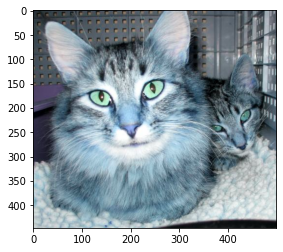

In [25]:
import cv2

img = cv2.imread(train_features[0])
#print(img.type) = np.ndarray
plt.imshow(img, cmap="gray")
plt.show()

In [33]:
class ImageTransform():

    def __init__(self, mean, std):
        self.data_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])

    def __call__(self, img):
        return self.data_transform(img)

In [19]:
# dataset이 없을 경우, 임의로 만들어주기 위한 코드

import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.transform = transforma
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {"image": image, "label": label}
        return sample

훈련해보기

In [20]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # 배치를 제외한 모든 차원을 평탄화(flatten)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [27]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [21]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [31]:
import numpy as np

In [32]:
for epoch in range(5):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i in range(11):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        #inputs, labels = data
        inputs = cv2.imread(train_features[i])
        inputs = np.array(inputs)
        
        labels = train_labels[i]

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2 == 1:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2))
            running_loss = 0.0

print('Finished Training')

TypeError: ignored